In [14]:
import numpy as np
import keras
import os
import re
import tensorflow as tf
import tensorflow .strings as strings
import shutil
import string
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing

# Exercice 4: Build a neural network to classify images

In this first part we are just going to explore our dataset and compute some basic statistics of the distribution of labels

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# first we need to save the name of the different classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

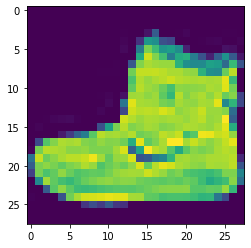

In [4]:
print(x_train[0])
plt.imshow(x_train[0])

In [5]:
print("length of x for the training set : ", len(x_train))
print("length of y for the training set : ", len(y_train))
print("length of x for the test set : ", len(x_test))
print("length of y for the test set : ", len(y_test))
print("shape of x for the training set : ", x_train.shape)
print("shape of y for the training set : ", y_train.shape)
print("shape of x for the test set : ", x_test.shape)
print("shape of y for the test set : ", y_test.shape)

length of x for the training set :  60000
length of y for the training set :  60000
length of x for the test set :  10000
length of y for the test set :  10000
shape of x for the training set :  (60000, 28, 28)
shape of y for the training set :  (60000,)
shape of x for the test set :  (10000, 28, 28)
shape of y for the test set :  (10000,)


In [6]:
# Some plots of the distribution of the distribution of the labels

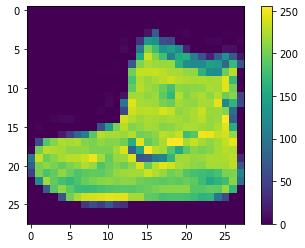

In [7]:
# print 
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

We are now going to run the provided code to classify the images

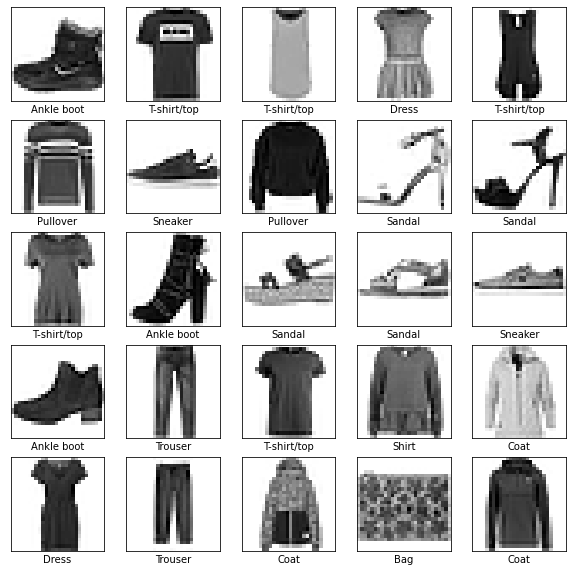

In [8]:
# first we need to pretreat our data
x_train = x_train / 255.0
x_test = x_test / 255.0
# print the 25 first pictures to verify the convertion
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [9]:
# Now, we can create our model
model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128,activation='relu'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 1s 622us/step - loss: 0.6264 - accuracy: 0.7837
Epoch 2/10
1875/1875 [==============================] - 1s 630us/step - loss: 0.3850 - accuracy: 0.8598
Epoch 3/10
1875/1875 [==============================] - 1s 622us/step - loss: 0.3406 - accuracy: 0.8744
Epoch 4/10
1875/1875 [==============================] - 1s 619us/step - loss: 0.3170 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 1s 621us/step - loss: 0.2944 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 1s 621us/step - loss: 0.2836 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 1s 617us/step - loss: 0.2664 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 1s 620us/step - loss: 0.2567 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 1s 621us/step - loss: 0.2470 - accuracy: 0.9097
Epoch 10/10
1875/1875 [==============================] - 1s 614u

In [17]:
# Some precidiction
probability_model = keras.Sequential([model, 
                                         keras.layers.Softmax()])
predictions = probability_model.predict(x_test)
predictions[0]

array([4.2753413e-06, 1.6459574e-09, 8.2983211e-09, 2.3030192e-10,
       1.6871320e-07, 2.5675945e-02, 5.6971262e-06, 8.2987221e-03,
       1.1373364e-06, 9.6601403e-01], dtype=float32)

In [18]:
# A prediction is an array of 10 numbers.
# The position of the higher value is the position of the corresponding label
np.argmax(predictions[0])

9

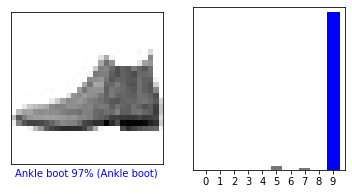

In [19]:
# 
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# The graphic representation of the ten categories using the two functions above
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

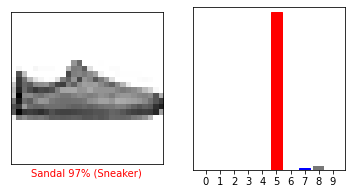

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

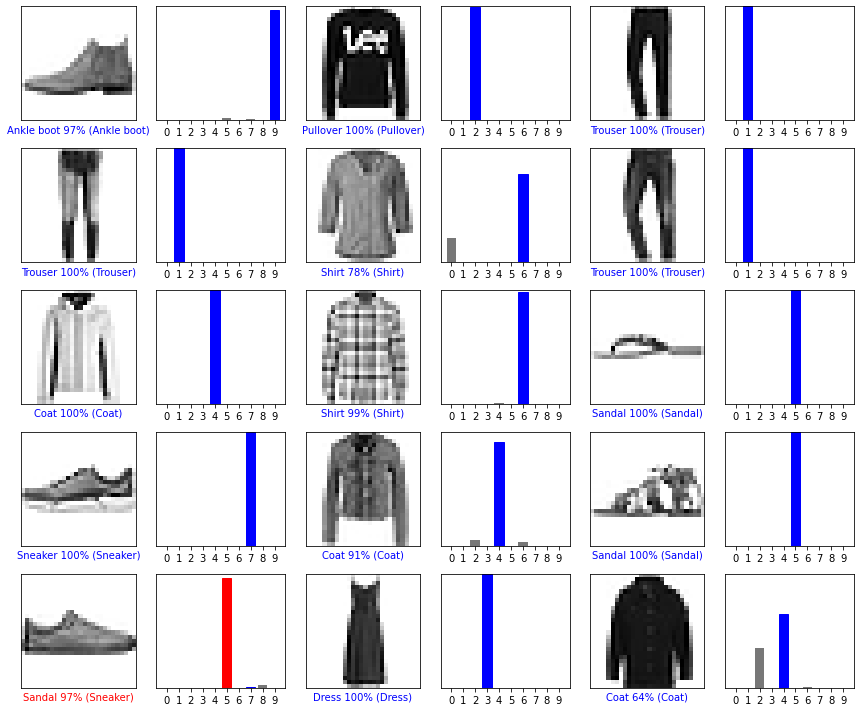

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

image shape :  (28, 28)
new image shape :  (1, 28, 28)
prediction array :  [[3.1791348e-04 7.7198122e-14 9.9830830e-01 4.3252527e-11 6.7600468e-04
  9.3299959e-16 6.9789222e-04 3.5144627e-14 1.8247103e-09 9.9384090e-14]]


2

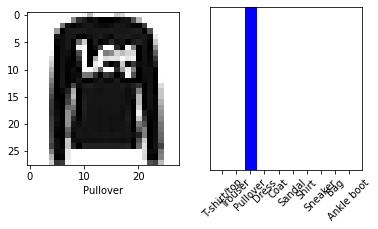

In [48]:
# Using our training model

# Grab an image from the test dataset.

img = x_test[1]
print("image shape : ",img.shape)

# Show the image selected
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(x_test[1], cmap=plt.cm.binary)
plt.xlabel(class_names[y_test[1]])

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print("new image shape : ",img.shape)

# Prediction of the correct label for this picture (ibn the form of the array of length ten we saw before)
predictions_single = probability_model.predict(img)
print("prediction array : ",predictions_single)

# And to finish we just show it with more
plt.subplot(1,2,2)
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])

And to finish this part we changed some parameters to see their influence on the network

In [53]:
# We are going to recreate our model by changing the topology of it
# With more hidden layers but the same number of neutrons

# 

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(32,activation='relu'),
    Dense(32,activation='relu'),
    Dense(32,activation='relu'),
    Dense(32,activation='relu'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 1s 600us/step - loss: 0.7672 - accuracy: 0.7296
Epoch 2/10
1875/1875 [==============================] - 1s 591us/step - loss: 0.4162 - accuracy: 0.8476
Epoch 3/10
1875/1875 [==============================] - 1s 591us/step - loss: 0.3774 - accuracy: 0.8616
Epoch 4/10
1875/1875 [==============================] - 1s 594us/step - loss: 0.3504 - accuracy: 0.8684
Epoch 5/10
1875/1875 [==============================] - 1s 596us/step - loss: 0.3302 - accuracy: 0.8781
Epoch 6/10
1875/1875 [==============================] - 1s 602us/step - loss: 0.3176 - accuracy: 0.8813
Epoch 7/10
1875/1875 [==============================] - 1s 607us/step - loss: 0.3084 - accuracy: 0.8844
Epoch 8/10
1875/1875 [==============================] - 1s 617us/step - loss: 0.2968 - accuracy: 0.8894
Epoch 9/10
1875/1875 [==============================] - 1s 597us/step - loss: 0.2861 - accuracy: 0.8930
Epoch 10/10
1875/1875 [==============================] - 1s 589u

In [55]:
# We are going to recreate our model by changing the topology and the layer size of it
# With more hidden layers but the same number of neutrons per hidden layer as the original one

# 

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.6549 - accuracy: 0.7632
Epoch 2/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.3779 - accuracy: 0.8614
Epoch 3/10
1875/1875 [==============================] - 2s 894us/step - loss: 0.3405 - accuracy: 0.8751
Epoch 4/10
1875/1875 [==============================] - 2s 901us/step - loss: 0.3067 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 2s 904us/step - loss: 0.2969 - accuracy: 0.8882
Epoch 6/10
1875/1875 [==============================] - 2s 912us/step - loss: 0.2828 - accuracy: 0.8933
Epoch 7/10
1875/1875 [==============================] - 2s 904us/step - loss: 0.2740 - accuracy: 0.8979
Epoch 8/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.2637 - accuracy: 0.9000
Epoch 9/10
1875/1875 [==============================] - 2s 902us/step - loss: 0.2512 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] - 2s 891u

In [56]:
# We are going to recreate our model by changing the topology of it
# Without any hidden layers

# 

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(10,activation='relu')
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 1s 473us/step - loss: 2.0583 - accuracy: 0.2137
Epoch 2/10
1875/1875 [==============================] - 1s 477us/step - loss: 1.8685 - accuracy: 0.2844
Epoch 3/10
1875/1875 [==============================] - 1s 482us/step - loss: 1.8441 - accuracy: 0.2856
Epoch 4/10
1875/1875 [==============================] - 1s 477us/step - loss: 1.8387 - accuracy: 0.2843
Epoch 5/10
1875/1875 [==============================] - 1s 480us/step - loss: 1.8374 - accuracy: 0.2834
Epoch 6/10
1875/1875 [==============================] - 1s 482us/step - loss: 1.8305 - accuracy: 0.2845
Epoch 7/10
1875/1875 [==============================] - 1s 479us/step - loss: 1.8176 - accuracy: 0.2882
Epoch 8/10
1875/1875 [==============================] - 1s 474us/step - loss: 1.8178 - accuracy: 0.2857
Epoch 9/10
1875/1875 [==============================] - 1s 472us/step - loss: 1.8283 - accuracy: 0.2811
Epoch 10/10
1875/1875 [==============================] - 1s 474u

In [59]:
# We are going to recreate our model by changing the layer size of it

# Decrease the size of the hidden layer 

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(10,activation='relu'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 1s 493us/step - loss: 0.9463 - accuracy: 0.6748
Epoch 2/10
1875/1875 [==============================] - 1s 492us/step - loss: 0.4796 - accuracy: 0.8328
Epoch 3/10
1875/1875 [==============================] - 1s 490us/step - loss: 0.4420 - accuracy: 0.8471
Epoch 4/10
1875/1875 [==============================] - 1s 495us/step - loss: 0.4232 - accuracy: 0.8535
Epoch 5/10
1875/1875 [==============================] - 1s 494us/step - loss: 0.4080 - accuracy: 0.8575
Epoch 6/10
1875/1875 [==============================] - 1s 497us/step - loss: 0.4111 - accuracy: 0.8567
Epoch 7/10
1875/1875 [==============================] - 1s 496us/step - loss: 0.3970 - accuracy: 0.8621
Epoch 8/10
1875/1875 [==============================] - 1s 494us/step - loss: 0.3912 - accuracy: 0.8632
Epoch 9/10
1875/1875 [==============================] - 1s 494us/step - loss: 0.3904 - accuracy: 0.8638
Epoch 10/10
1875/1875 [==============================] - 1s 502u

In [ ]:
# We are going to recreate our model by changing the layer size of it

# Increase the size of the hidden layer

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(400,activation='relu'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

In [60]:
# We are going to recreate our model by changing the activation functions of it

# Increase the size of the hidden layer

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(400,activation='relu'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6594 - accuracy: 0.7738
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3974 - accuracy: 0.8561
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3502 - accuracy: 0.8721
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3175 - accuracy: 0.8818
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2978 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2784 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2610 - accuracy: 0.9037
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2438 - accuracy: 0.9091
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2388 - accuracy: 0.9099
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.222

In [61]:
# We are going to recreate our model by changing the activation functions of it

# The sigmoid activation function

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128,activation='sigmoid'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 1s 636us/step - loss: 0.7224 - accuracy: 0.7657
Epoch 2/10
1875/1875 [==============================] - 1s 638us/step - loss: 0.4009 - accuracy: 0.8554
Epoch 3/10
1875/1875 [==============================] - 1s 641us/step - loss: 0.3626 - accuracy: 0.8673
Epoch 4/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.3297 - accuracy: 0.8805
Epoch 5/10
1875/1875 [==============================] - 1s 647us/step - loss: 0.3159 - accuracy: 0.8854
Epoch 6/10
1875/1875 [==============================] - 1s 643us/step - loss: 0.2991 - accuracy: 0.8900
Epoch 7/10
1875/1875 [==============================] - 1s 647us/step - loss: 0.2811 - accuracy: 0.8960
Epoch 8/10
1875/1875 [==============================] - 1s 661us/step - loss: 0.2688 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 1s 649us/step - loss: 0.2589 - accuracy: 0.9036
Epoch 10/10
1875/1875 [==============================] - 1s 645u

In [62]:
# We are going to recreate our model by changing the activation functions of it

# The softmax activation function

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128,activation='softmax'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 1s 658us/step - loss: 1.7258 - accuracy: 0.5737
Epoch 2/10
1875/1875 [==============================] - 1s 663us/step - loss: 0.8868 - accuracy: 0.6712
Epoch 3/10
1875/1875 [==============================] - 1s 664us/step - loss: 0.7471 - accuracy: 0.6853
Epoch 4/10
1875/1875 [==============================] - 1s 668us/step - loss: 0.6872 - accuracy: 0.7117
Epoch 5/10
1875/1875 [==============================] - 1s 661us/step - loss: 0.6411 - accuracy: 0.7387
Epoch 6/10
1875/1875 [==============================] - 1s 670us/step - loss: 0.6107 - accuracy: 0.7494
Epoch 7/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.5851 - accuracy: 0.7663
Epoch 8/10
1875/1875 [==============================] - 1s 657us/step - loss: 0.5474 - accuracy: 0.7926
Epoch 9/10
1875/1875 [==============================] - 1s 652us/step - loss: 0.5213 - accuracy: 0.8075
Epoch 10/10
1875/1875 [==============================] - 1s 667u

In [63]:
# We are going to recreate our model by changing the activation functions of it

# The softplus activation function

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128,activation='softplus'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 1s 672us/step - loss: 0.6305 - accuracy: 0.7835
Epoch 2/10
1875/1875 [==============================] - 1s 662us/step - loss: 0.3916 - accuracy: 0.8589
Epoch 3/10
1875/1875 [==============================] - 1s 667us/step - loss: 0.3514 - accuracy: 0.8715
Epoch 4/10
1875/1875 [==============================] - 1s 665us/step - loss: 0.3207 - accuracy: 0.8807
Epoch 5/10
1875/1875 [==============================] - 1s 665us/step - loss: 0.2958 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 1s 670us/step - loss: 0.2803 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 1s 674us/step - loss: 0.2677 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 1s 673us/step - loss: 0.2529 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 1s 674us/step - loss: 0.2447 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 1s 670u

In [64]:
# We are going to recreate our model by changing the activation functions of it

# The softsign activation function

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128,activation='softsign'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 1s 629us/step - loss: 0.6190 - accuracy: 0.7835
Epoch 2/10
1875/1875 [==============================] - 1s 649us/step - loss: 0.3809 - accuracy: 0.8620
Epoch 3/10
1875/1875 [==============================] - 1s 644us/step - loss: 0.3485 - accuracy: 0.8740
Epoch 4/10
1875/1875 [==============================] - 1s 649us/step - loss: 0.3291 - accuracy: 0.8784
Epoch 5/10
1875/1875 [==============================] - 1s 651us/step - loss: 0.3073 - accuracy: 0.8884
Epoch 6/10
1875/1875 [==============================] - 1s 649us/step - loss: 0.2971 - accuracy: 0.8913
Epoch 7/10
1875/1875 [==============================] - 1s 642us/step - loss: 0.2849 - accuracy: 0.8940
Epoch 8/10
1875/1875 [==============================] - 1s 637us/step - loss: 0.2749 - accuracy: 0.8971
Epoch 9/10
1875/1875 [==============================] - 1s 641us/step - loss: 0.2631 - accuracy: 0.9021
Epoch 10/10
1875/1875 [==============================] - 1s 635u

In [65]:
# We are going to recreate our model by changing the activation functions of it

# The tanh activation function

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128,activation='tanh'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 1s 659us/step - loss: 0.6069 - accuracy: 0.7860
Epoch 2/10
1875/1875 [==============================] - 1s 667us/step - loss: 0.3662 - accuracy: 0.8674
Epoch 3/10
1875/1875 [==============================] - 1s 664us/step - loss: 0.3380 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 1s 663us/step - loss: 0.3174 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 1s 659us/step - loss: 0.2989 - accuracy: 0.8884
Epoch 6/10
1875/1875 [==============================] - 1s 663us/step - loss: 0.2843 - accuracy: 0.8939
Epoch 7/10
1875/1875 [==============================] - 1s 663us/step - loss: 0.2673 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 1s 670us/step - loss: 0.2568 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 1s 681us/step - loss: 0.2496 - accuracy: 0.9058
Epoch 10/10
1875/1875 [==============================] - 1s 678u

In [66]:
# We are going to recreate our model by changing the activation functions of it

# The selu activation function

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128,activation='selu'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 1s 658us/step - loss: 0.6053 - accuracy: 0.7859
Epoch 2/10
1875/1875 [==============================] - 1s 656us/step - loss: 0.3962 - accuracy: 0.8543
Epoch 3/10
1875/1875 [==============================] - 1s 656us/step - loss: 0.3494 - accuracy: 0.8741
Epoch 4/10
1875/1875 [==============================] - 1s 671us/step - loss: 0.3292 - accuracy: 0.8803
Epoch 5/10
1875/1875 [==============================] - 1s 659us/step - loss: 0.3114 - accuracy: 0.8856
Epoch 6/10
1875/1875 [==============================] - 1s 657us/step - loss: 0.2905 - accuracy: 0.8904
Epoch 7/10
1875/1875 [==============================] - 1s 653us/step - loss: 0.2793 - accuracy: 0.8954
Epoch 8/10
1875/1875 [==============================] - 1s 665us/step - loss: 0.2642 - accuracy: 0.9012
Epoch 9/10
1875/1875 [==============================] - 1s 678us/step - loss: 0.2558 - accuracy: 0.9045
Epoch 10/10
1875/1875 [==============================] - 1s 671u

In [67]:
# We are going to recreate our model by changing the activation functions of it

# The elu activation function

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128,activation='elu'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 1s 682us/step - loss: 0.6039 - accuracy: 0.7874
Epoch 2/10
1875/1875 [==============================] - 1s 673us/step - loss: 0.3916 - accuracy: 0.8571
Epoch 3/10
1875/1875 [==============================] - 1s 687us/step - loss: 0.3454 - accuracy: 0.8715
Epoch 4/10
1875/1875 [==============================] - 1s 677us/step - loss: 0.3125 - accuracy: 0.8832
Epoch 5/10
1875/1875 [==============================] - 1s 675us/step - loss: 0.2986 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 1s 714us/step - loss: 0.2785 - accuracy: 0.8945
Epoch 7/10
1875/1875 [==============================] - 1s 699us/step - loss: 0.2666 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 1s 675us/step - loss: 0.2530 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 1s 684us/step - loss: 0.2457 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 1s 663u

In [68]:
# We are going to recreate our model by changing the activation functions of it

# The exponential activation function

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# loading of the model

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128,activation='exponential'),
    Dense(10)
])
# We compile our model with 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# We start the training
model.fit(x_train, y_train, epochs=10)
# Evaluate the accuracy of the result
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 1s 646us/step - loss: 0.6220 - accuracy: 0.7850
Epoch 2/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.3953 - accuracy: 0.8581
Epoch 3/10
1875/1875 [==============================] - 1s 636us/step - loss: 0.3645 - accuracy: 0.8697
Epoch 4/10
1875/1875 [==============================] - 1s 648us/step - loss: 0.3531 - accuracy: 0.8733
Epoch 5/10
1875/1875 [==============================] - 1s 654us/step - loss: 0.3366 - accuracy: 0.8770
Epoch 6/10
1875/1875 [==============================] - 1s 655us/step - loss: 0.3458 - accuracy: 0.8808
Epoch 7/10
1875/1875 [==============================] - 1s 657us/step - loss: 0.3337 - accuracy: 0.8828
Epoch 8/10
1875/1875 [==============================] - 1s 654us/step - loss: 0.3065 - accuracy: 0.8891
Epoch 9/10
1875/1875 [==============================] - 1s 661us/step - loss: 0.2973 - accuracy: 0.8934
Epoch 10/10
1875/1875 [==============================] - 1s 662u

# Exercice 5: Build a neural network for text classification

For this TP, in the first we train and test a multiplayer layer with the code provided in the practical sheet

## Sentiment analysis

### Download and explore the IMDB dataset

In [2]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
dataset = keras.utils.get_file("aclImdb_v1.tar.gz", url,untar=True, cache_dir='.',cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

In [3]:
os.listdir(dataset_dir)
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


### Load the dataset

In [4]:
# of the data
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)
batch_size = 32
seed = 42

raw_train_ds = keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [5]:
#
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])
    
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [6]:
# We take aregoing to create a set of validation and a set of test.
raw_val_ds = keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)
# We are going to keep the 5000 other reviews from the formation set for validation
raw_test_ds = keras.preprocessing.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


### Prepare the dataset for training

In [7]:
# Now we can prepare our data for the formation
def custom_standardization(input_data):
  lowercase = strings.lower(input_data)
  stripped_html = strings.regex_replace(lowercase, '<br />', ' ')
  return strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')
# Creation of a textVectorisation to standardise, tokenise and vectorise our data

max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [8]:
# 
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

# 
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

# 
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

Review tf.Tensor(b'Silent Night, Deadly Night 5 is the very last of the series, and like part 4, it\'s unrelated to the first three except by title and the fact that it\'s a Christmas-themed horror flick.<br /><br />Except to the oblivious, there\'s some obvious things going on here...Mickey Rooney plays a toymaker named Joe Petto and his creepy son\'s name is Pino. Ring a bell, anyone? Now, a little boy named Derek heard a knock at the door one evening, and opened it to find a present on the doorstep for him. Even though it said "don\'t open till Christmas", he begins to open it anyway but is stopped by his dad, who scolds him and sends him to bed, and opens the gift himself. Inside is a little red ball that sprouts Santa arms and a head, and proceeds to kill dad. Oops, maybe he should have left well-enough alone. Of course Derek is then traumatized by the incident since he watched it from the stairs, but he doesn\'t grow up to be some killer Santa, he just stops talking.<br /><br />T

### Configure the dataset for performance

In [9]:
# Configuration of the data

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

In [17]:
# Creation of the model

embedding_dim = 16

model = tf.keras.Sequential([
    # First, we trun our index into dense vecto of fixed size
  layers.Embedding(max_features + 1, embedding_dim),
    # After that we create a layer which will sets input units to 0 at a rate of 0.2 during the training 
    # to prevent overfitting
  layers.Dropout(0.2),
    # Then we pool our data into a 2D tensor with shape(batch_size, features)
  layers.GlobalAveragePooling1D(),
    # We drop again in the same way as before
  layers.Dropout(0.2),
    # And in the end we add the layer of one dimension for the result
  layers.Dense(1)])

model.summary()

size of the model:  48
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
dropout_12 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_6 ( (None, 16)                0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


### Loss function and optimizer

In [18]:
# binary crossentropy loss function and adam optimizer

model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

# Creation of the model

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 27s 42ms/step - loss: 0.6824 - binary_accuracy: 0.6152 - val_loss: 0.6152 - val_binary_accuracy: 0.7706
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5803 - binary_accuracy: 0.7838 - val_loss: 0.4984 - val_binary_accuracy: 0.8220
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4659 - binary_accuracy: 0.8387 - val_loss: 0.4201 - val_binary_accuracy: 0.8474
Epoch 4/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3914 - binary_accuracy: 0.8606 - val_loss: 0.3737 - val_binary_accuracy: 0.8608
Epoch 5/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3453 - binary_accuracy: 0.8749 - val_loss: 0.3448 - val_binary_accuracy: 0.8670
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3118 - binary_accuracy: 0.8864 - val_loss: 0.3258 - val_binary_accuracy: 0.8714
Epoch 7/10
625/625 [==============================] - 1s 2ms/s

### Train the model

In [19]:
# evaluation of the model

loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 85s 108ms/step - loss: 0.3103 - binary_accuracy: 0.8734
Loss:  0.31027287244796753
Accuracy:  0.8734400272369385


### Create a plot of accuracy and loss over time

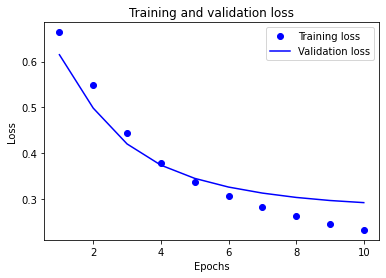

In [20]:
#

history_dict = history.history

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

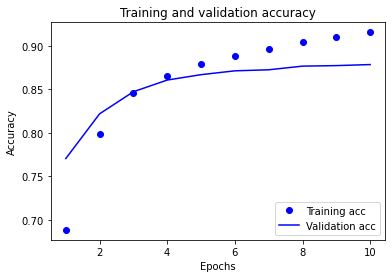

In [21]:
# plot of the curve of the representation between 

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [22]:
# Exportation of our model

export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 11s 14ms/step - loss: 0.3053 - accuracy: 0.8770
0.8734400272369385


After this done, we experimented with differents sizes of the network

- First we test it with an increased size

In [23]:
# First we improve the size by increasing the number of layer

embedding_dim = 16

model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(17),
  layers.Dense(17),
  layers.Dense(17),
  layers.Dense(1)])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
dropout_14 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_7 ( (None, 16)                0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 17)                289       
_________________________________________________________________
dense_8 (Dense)              (None, 17)                306       
_________________________________________________________________
dense_9 (Dense)              (None, 17)               

In [24]:
# After that we increase the network size by increasing the number of perceptrons

embedding_dim = 100

model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 100)         1000100   
_________________________________________________________________
dropout_16 (Dropout)         (None, None, 100)         0         
_________________________________________________________________
global_average_pooling1d_8 ( (None, 100)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 1,000,201
Trainable params: 1,000,201
Non-trainable params: 0
_________________________________________________________________


- Then we test it with an decreased size

In [ ]:
# First we reduce the size by decreasing the number of layer

embedding_dim = 16

model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

In [ ]:
# After that we reduce the network size by decreasing the number of perceptrons by layers

embedding_dim = 4

model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

We changed our network to demonstrate overfitting

In [ ]:
# We delete the dropout which prevent overfitting during the training

embedding_dim = 16

model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(1)])

model.summary()

And to finish we tried three way to prevent overfitting on our network :
- Add weight regularization

- Add dropout

In [ ]:
# Adding droupout alow us to sets imput training to 0 during the training at a given rate (what was originaly done)

- combined L2 + dropout

A more detailed description of our actions and results will be found in our final report